In [1]:
import requests
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
url = "http://www.gutenberg.org/cache/epub/174/pg174.txt" # Picture of Dorian Gray
response = requests.get(url)
book_text = response.text

In [6]:
book_text[:2000]

'\ufeffThe Project Gutenberg eBook of The Picture of Dorian Gray\r\n    \r\nThis ebook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this ebook or online\r\nat www.gutenberg.org. If you are not located in the United States,\r\nyou will have to check the laws of the country where you are located\r\nbefore using this eBook.\r\n\r\nTitle: The Picture of Dorian Gray\r\n\r\n\r\nAuthor: Oscar Wilde\r\n\r\nRelease date: October 1, 1994 [eBook #174]\r\n                Most recently updated: February 3, 2022\r\n\r\nLanguage: English\r\n\r\n\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK THE PICTURE OF DORIAN GRAY ***\r\n\r\n\r\n\r\nThe Picture of Dorian Gray\r\n\r\nby Oscar Wilde\r\n\r\n\r\nContents\r\n\r\n THE PREFACE\r\n CHAPTER I.\r\n CHAPTER II.\r\n CHAPTER III.\r\n CHAPTER IV.\r\

In [7]:
# Split the text into chapters
# Use a regular expression to idetify chapter headings (e.g. "Chapter 1") and split text accordingly
chapter_splits = re.split(r'CHAPTER [IVXLCDM]+\.', book_text)

# Create a list to store the chapter text
chapters = []

# Iterate through chapter_splits and remove extra whitespace
for chapter in chapter_splits[1:]:   # [1:] because we want to ignore the intro/meta data
    chapter = chapter.strip()
    if chapter:
        chapters.append(chapter)
        
# This trims the last chapter to only include text up to 'THE END'
end_index = chapters[-1].find("THE END")
if end_index != -1:
    chapters[-1] = chapters[-1][:end_index].strip()
    
# check results
len(chapters)
# Expect to be 12 chapters (unless splits not completed as expected)

21

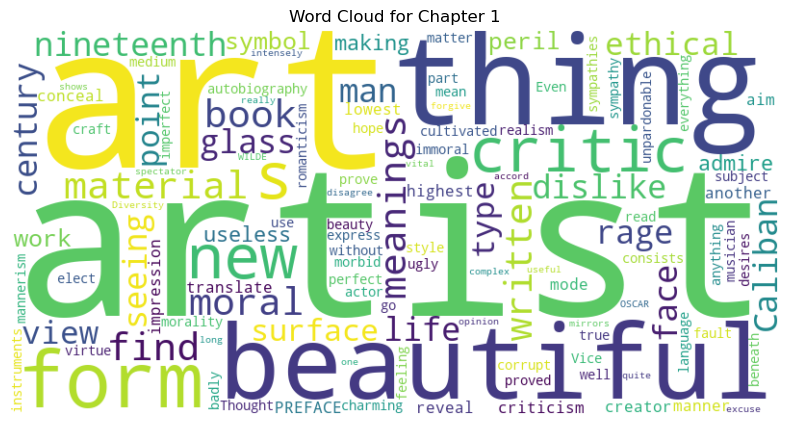

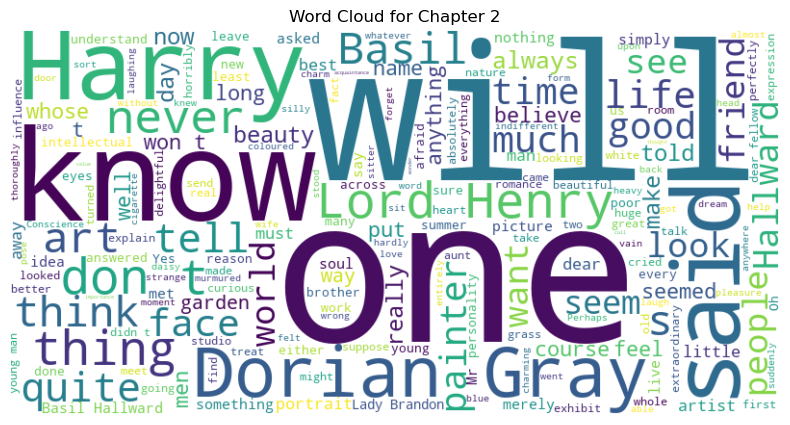

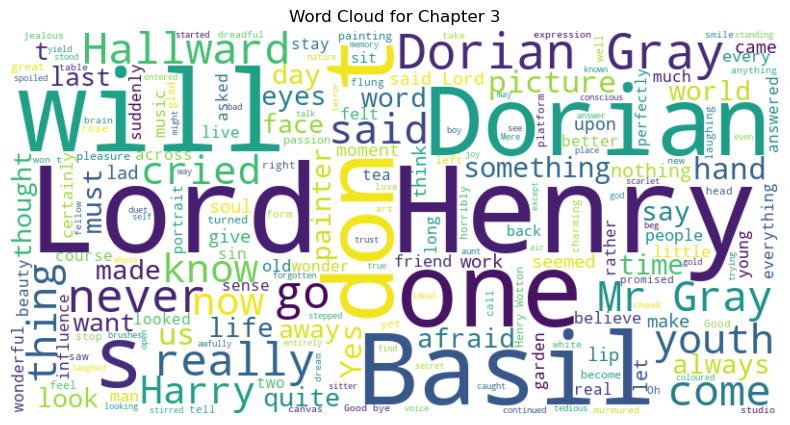

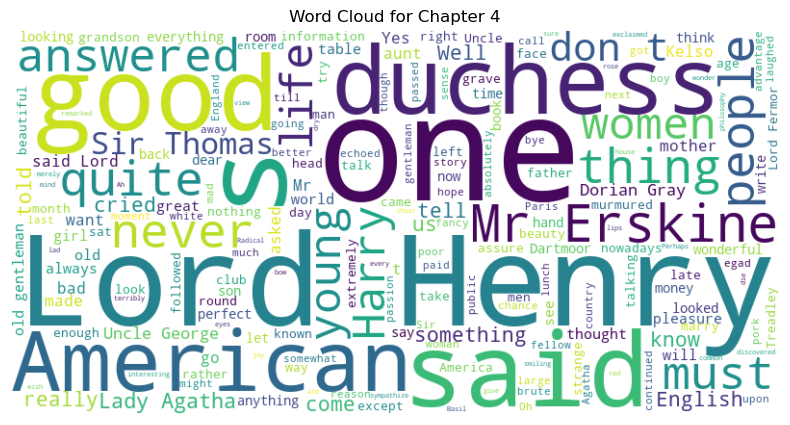

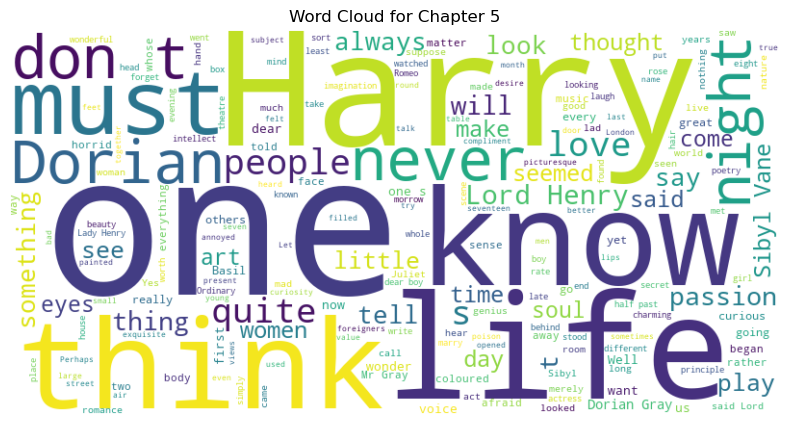

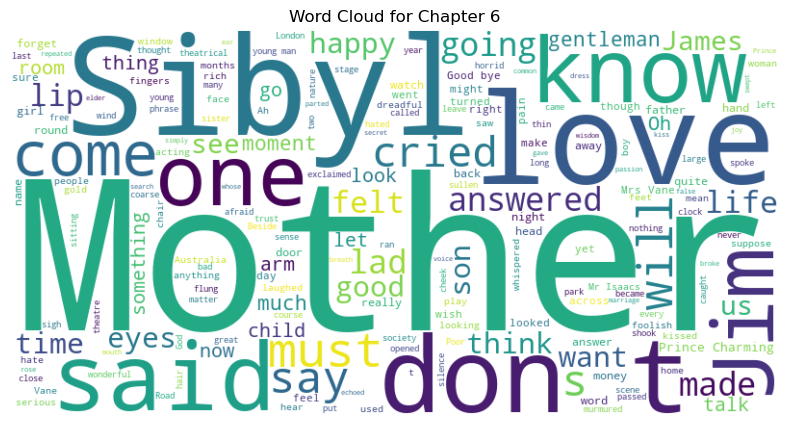

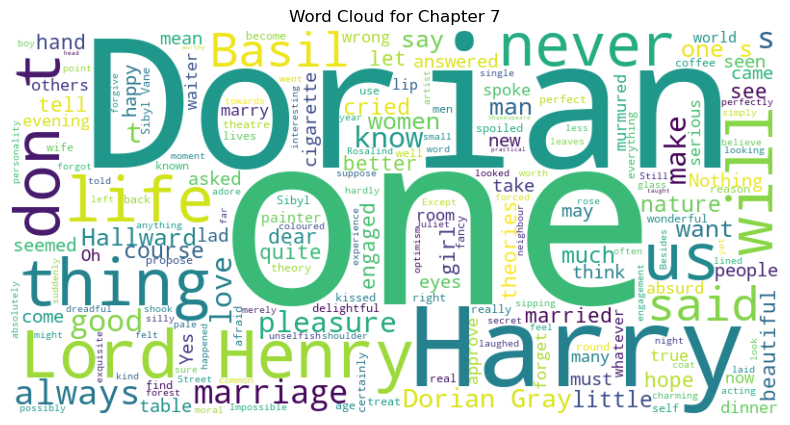

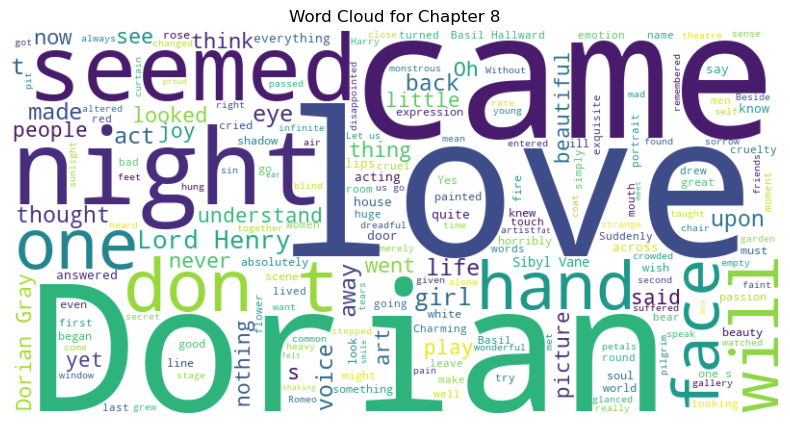

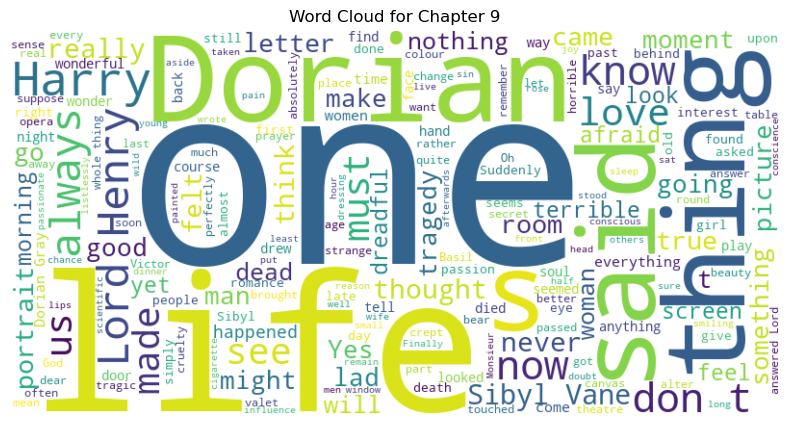

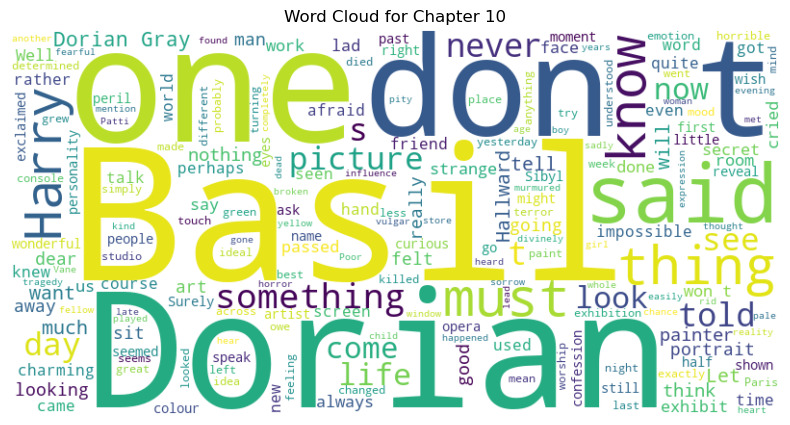

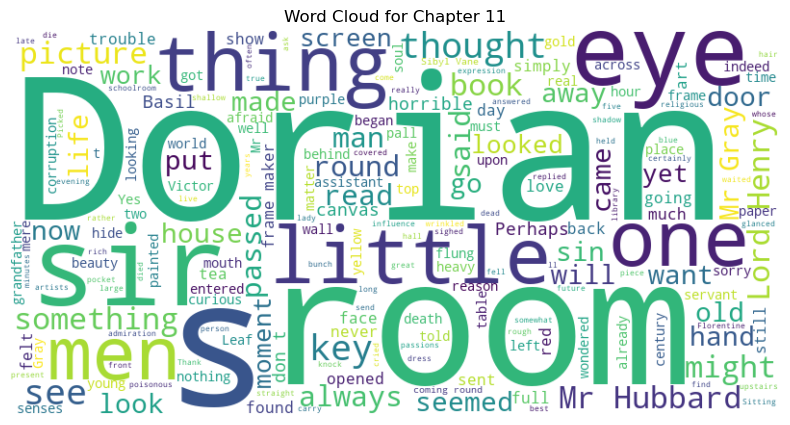

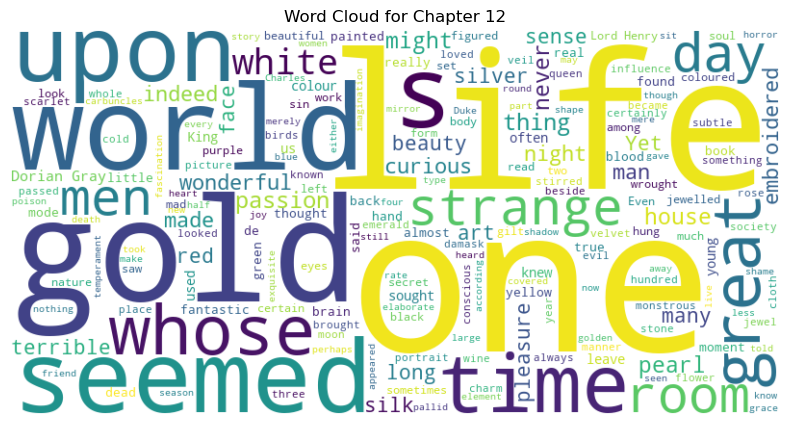

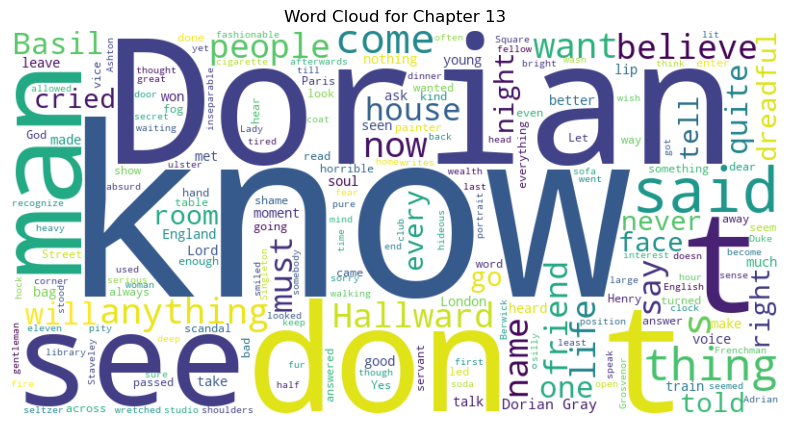

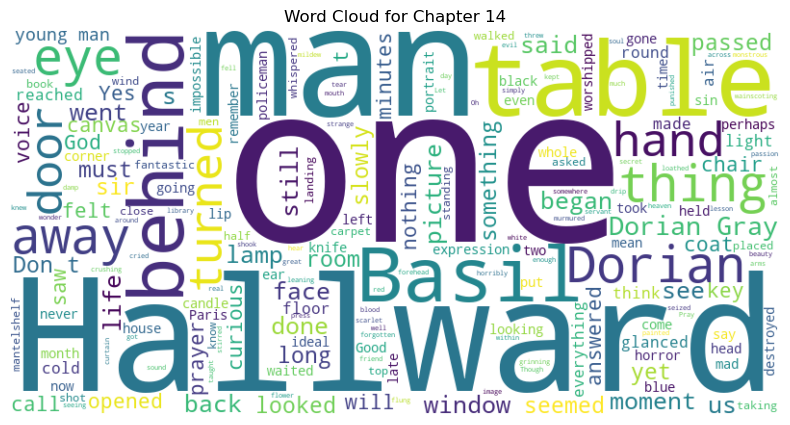

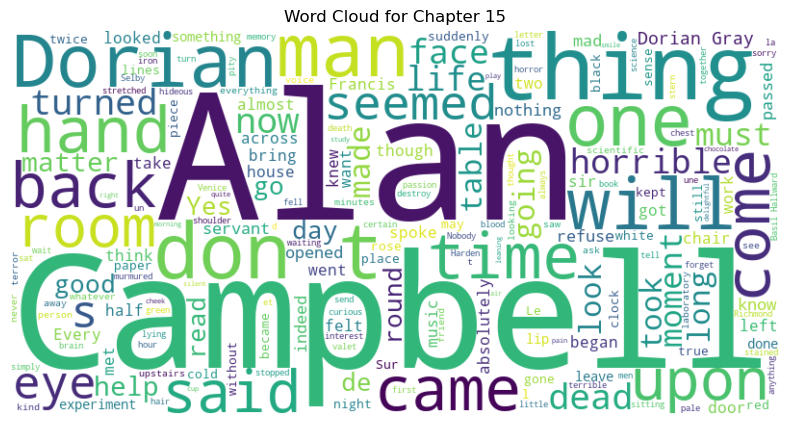

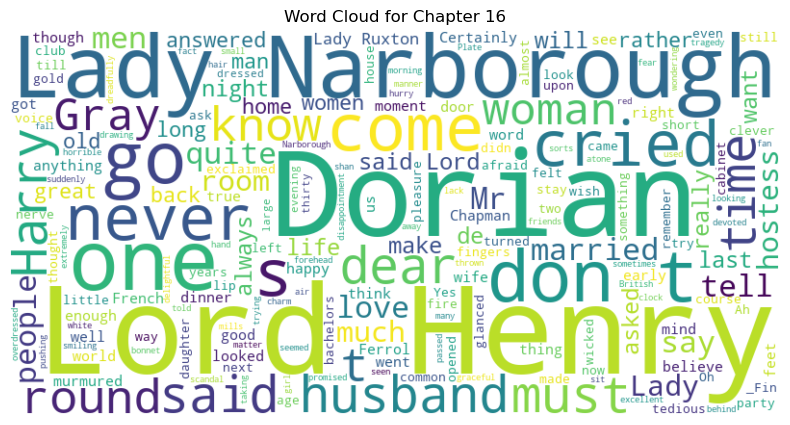

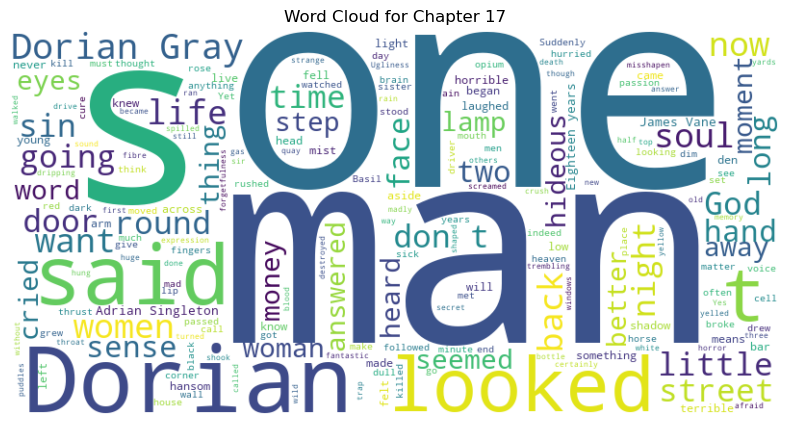

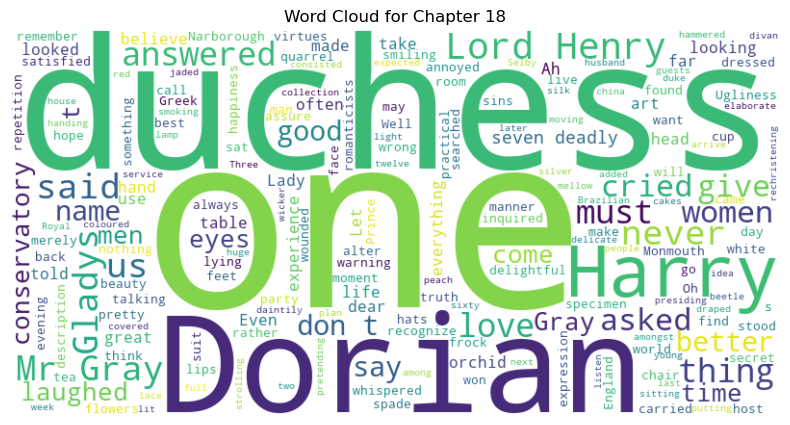

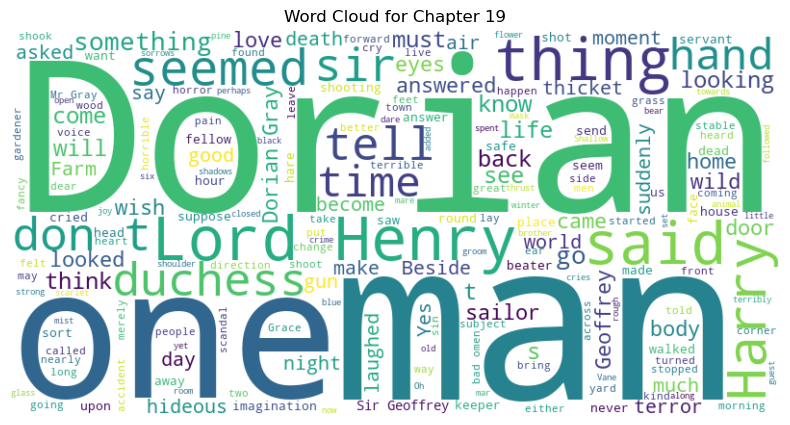

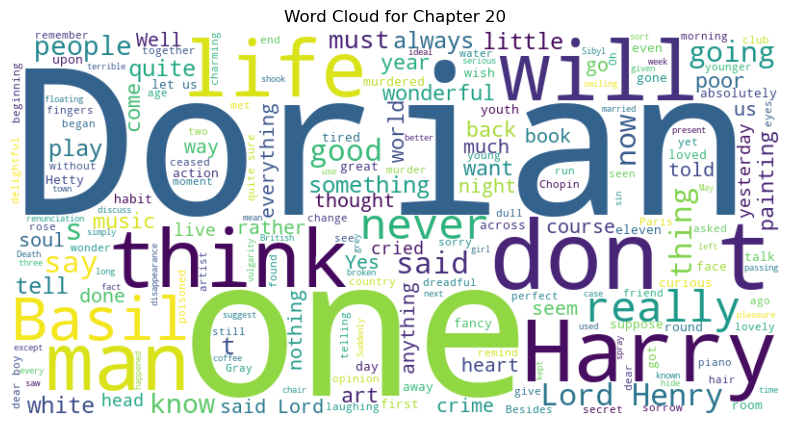

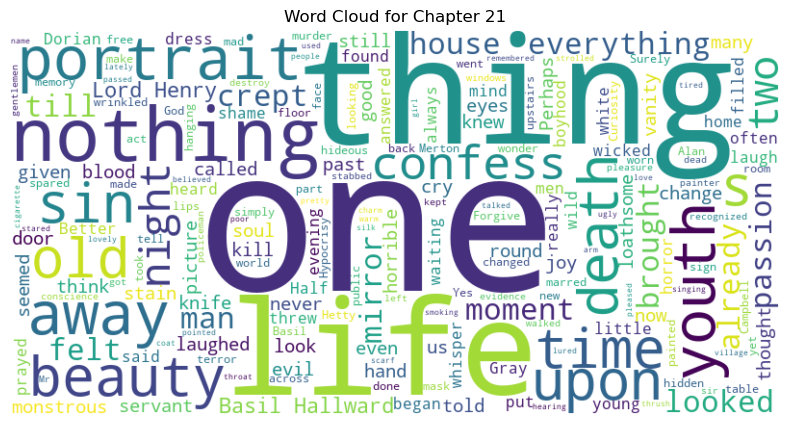

In [8]:
# Create a word cloud for each chapter
for i, chapter in enumerate(chapters[:]):
    # Initialise WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')
    
    # Generate word cloud
    wordcloud.generate(chapter)
    
    # Display the word cloud for the chapter
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Chapter {i+1}')
    plt.axis('off')
    plt.show()

In [13]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
analyzer = SentimentIntensityAnalyzer()

In [16]:
# Create dataframe to store sentiment scores for each chapter
sentiment_df = pd.DataFrame(columns=["Chapter", "Compound Score"])

In [17]:
# Perform sentiment analysis on each chapter
for i, chapter in enumerate(chapters[:]):
    # Perform sentiment analysis on the chapter text
    sentiment_scores = analyzer.polarity_scores(chapter)
    
    # Extract the compound sentiment score (meansure of overall sentiment)
    compound_score = sentiment_scores['compound']
    
    # Append the results to the dataframe
    sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)
    
# Display the sentiment analysis results
sentiment_df

C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\3251442208.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\3251442208.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_10660\3251442208.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sentiment_df = sentiment_df.append({"Chapter": f"Chapter {i+1}", "Compound Score": compound_score}, ignore_index=True)
C:\Users\Admin\AppData\Local\Temp\

Chapter  Compound Score
0    Chapter 1          0.7304
1    Chapter 2          0.9999
2    Chapter 3          0.9999
3    Chapter 4          0.9999
4    Chapter 5          1.0000
5    Chapter 6          0.9999
6    Chapter 7          0.9999
7    Chapter 8          0.9996
8    Chapter 9          0.9848
9   Chapter 10          0.9994
10  Chapter 11          0.9320
11  Chapter 12          0.9999
12  Chapter 13          0.9961
13  Chapter 14         -0.9986
14  Chapter 15         -0.9976
15  Chapter 16          0.9996
16  Chapter 17         -0.9997
17  Chapter 18          0.9994
18  Chapter 19         -0.9995
19  Chapter 20          0.9992
20  Chapter 21         -0.9993